In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
iris = pd.read_csv("Iris.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [ ]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
iris_setosa=iris.loc[iris["Species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["Species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["Species"]=="Iris-versicolor"]

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

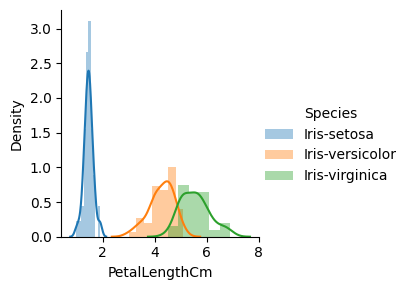

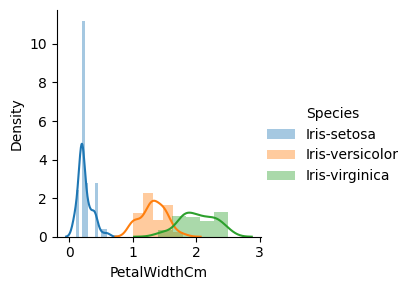

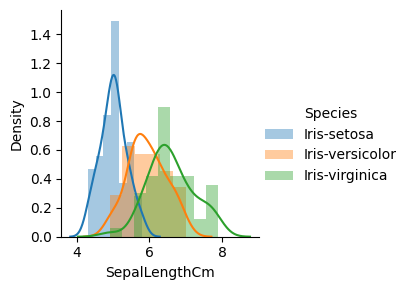

In [ ]:
# sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"petal_length").add_legend()
# sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"petal_width").add_legend()
# sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"sepal_length").add_legend()
# plt.show()

sns.FacetGrid(iris, hue="Species", height=3).map(sns.distplot, "PetalLengthCm").add_legend()
sns.FacetGrid(iris, hue="Species", height=3).map(sns.distplot, "PetalWidthCm").add_legend()
sns.FacetGrid(iris, hue="Species", height=3).map(sns.distplot, "SepalLengthCm").add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


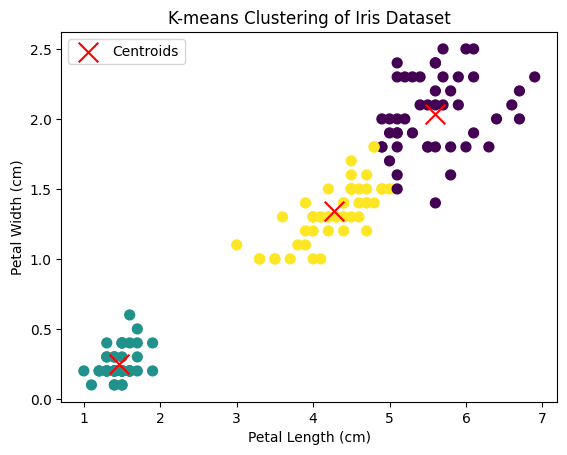

In [ ]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Selecting features for clustering (petal length and petal width)
X = iris_df[['petal length (cm)', 'petal width (cm)']]

# Initializing KMeans with 3 clusters (as there are 3 types of iris species)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the selected features
kmeans.fit(X)

# Getting the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualizing the clusters along with the centroids
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-means Clustering of Iris Dataset')
plt.legend()
plt.show()

#This code snippet loads the Iris dataset, selects the 'petal length' and 'petal width' features, performs K-means clustering with three clusters (since there are three species of iris in the dataset), and visualizes the clusters along with their centroids. Adjust the number of clusters and features based on your requirements or explore different aspects of the dataset.

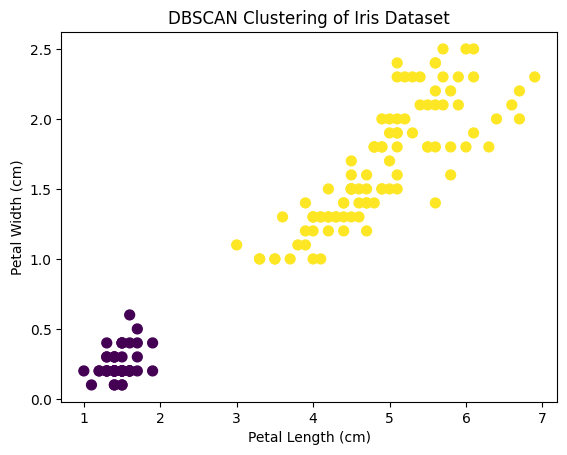

In [ ]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Selecting features for clustering (petal length and petal width)
X = iris_df[['petal length (cm)', 'petal width (cm)']]

# Initializing DBSCAN with epsilon=0.5 and minimum samples=5 (adjust these as needed)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN to the selected features
dbscan.fit(X)

# Getting the cluster labels (-1 represents outliers, other integers represent different clusters)
labels = dbscan.labels_

# Visualizing the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('DBSCAN Clustering of Iris Dataset')
plt.show()


## Hierarchical Clustering

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

# Importa Packages
import numpy as np                # linear algebra
import pandas as pd               # data frames
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
import scipy.stats                # statistics
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
iris = pd.read_csv("Iris.csv")

#Primeros registros
print(iris.head())
# No de observaciones y tipo de datos
print(iris.info())
# Numero de Observaciones y Columnas
print(iris.shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
(150, 6)


<ipython-input-11-49d135779587>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(matcorr, dtype=np.bool)


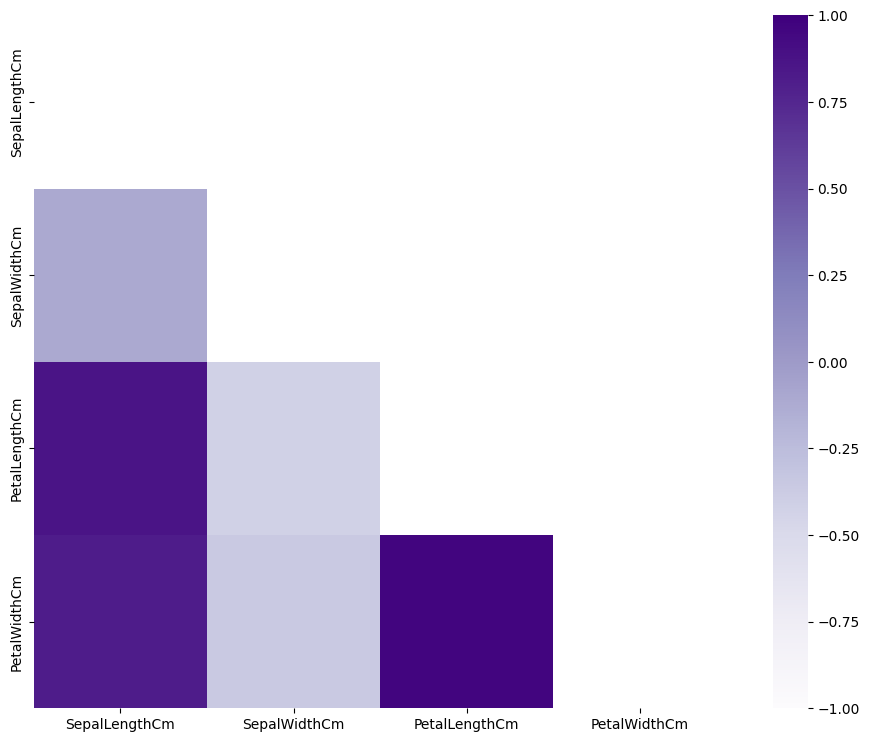

In [ ]:
#Matriz de correlacion
matcorr = iris.iloc[:,~iris.columns.isin(['Id','Species'])].corr()
mask = np.zeros_like(matcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matcorr, mask=mask, cmap="Purples", vmin=-1, vmax=1, center=0, square=True);
plt.show()

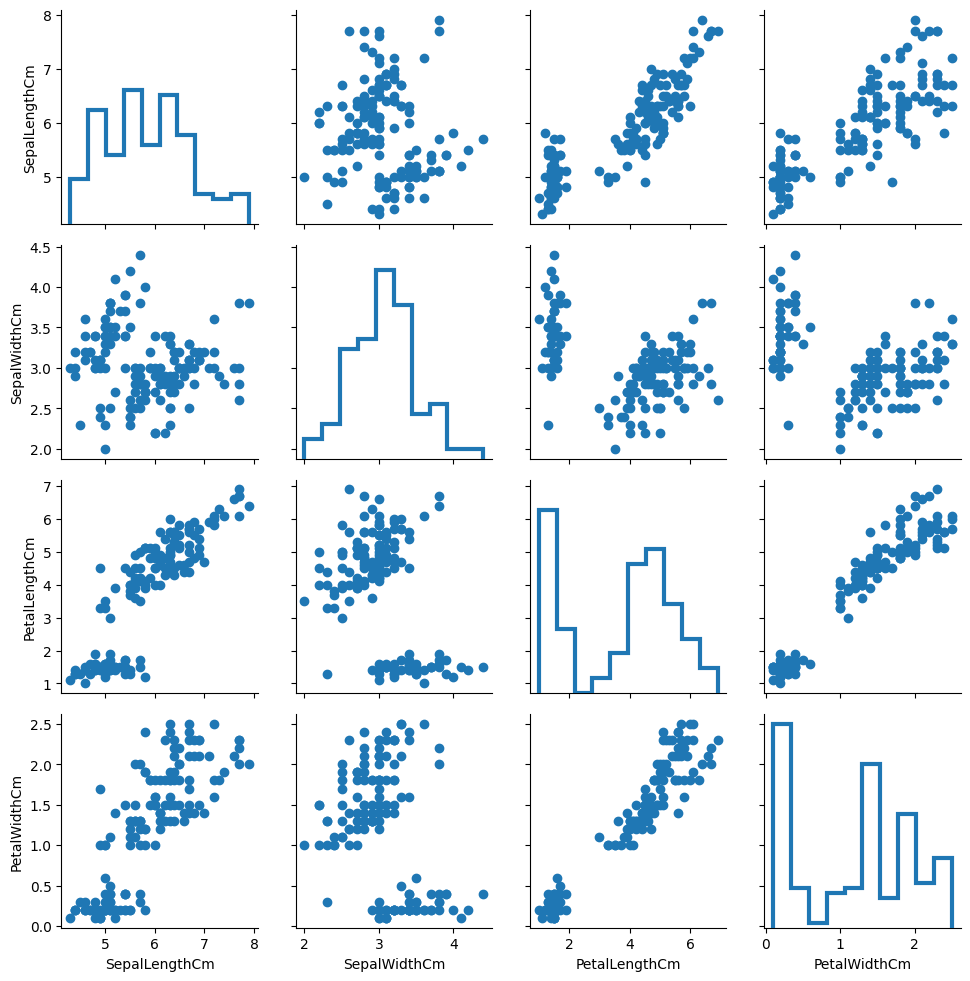

In [ ]:
g = sns.PairGrid(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])
g.map_diag(plt.hist, histtype="step", linewidth=3)
g.map_offdiag(plt.scatter)

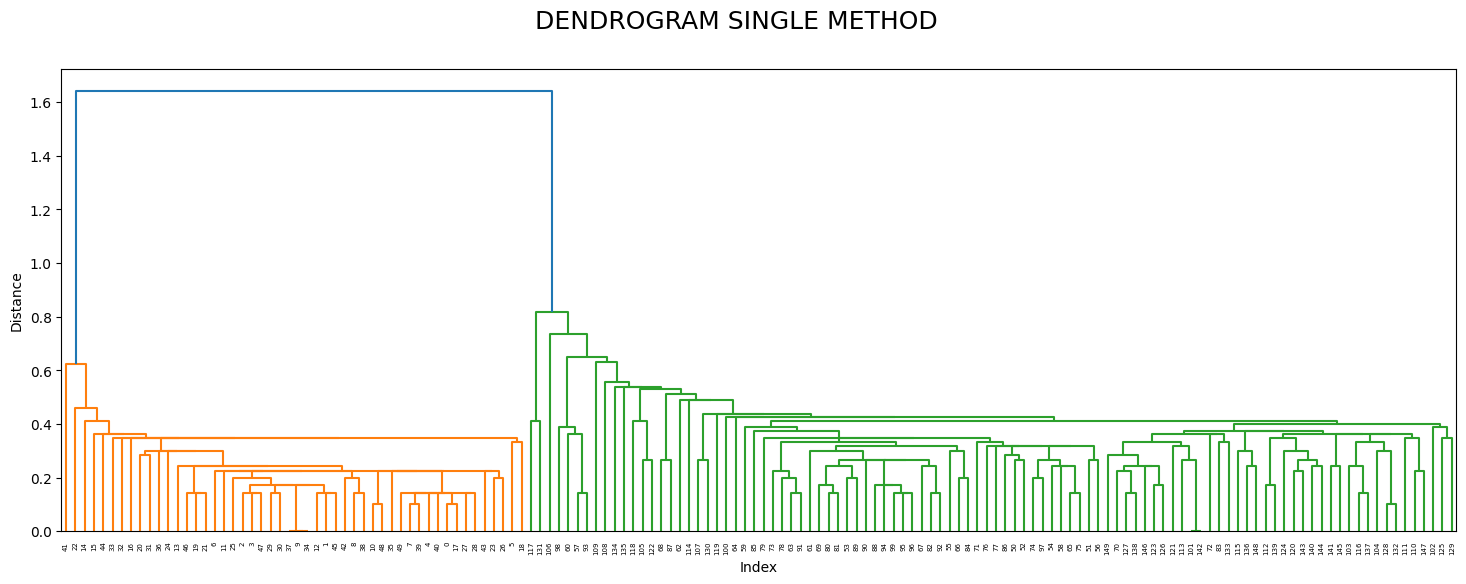

In [ ]:
dist_sin = linkage(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

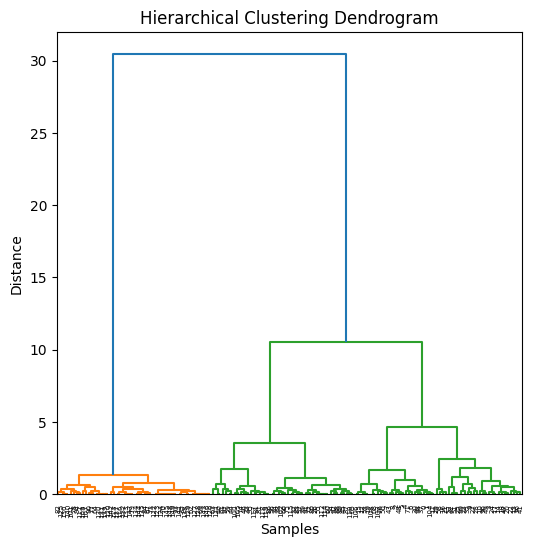

In [ ]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Selecting features for clustering (petal length and petal width)
X = iris_df[['petal length (cm)', 'petal width (cm)']]

# Initializing Hierarchical Agglomerative Clustering with linkage='ward' (other linkage options available)
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')

# Fit the Hierarchical Agglomerative Clustering to the selected features
agg_clustering.fit(X)

# Getting the cluster labels
labels = agg_clustering.labels_

# Calculate the linkage matrix
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X, method='ward')

# Plotting dendrogram
def plot_dendrogram(Z, **kwargs):
    plt.figure(figsize=(6, 6))
    dendrogram(Z, labels=labels, count_sort='ascending', distance_sort='ascending', show_leaf_counts=True, **kwargs)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plot_dendrogram(Z)
plt.show()



All Clustering for Iris Dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


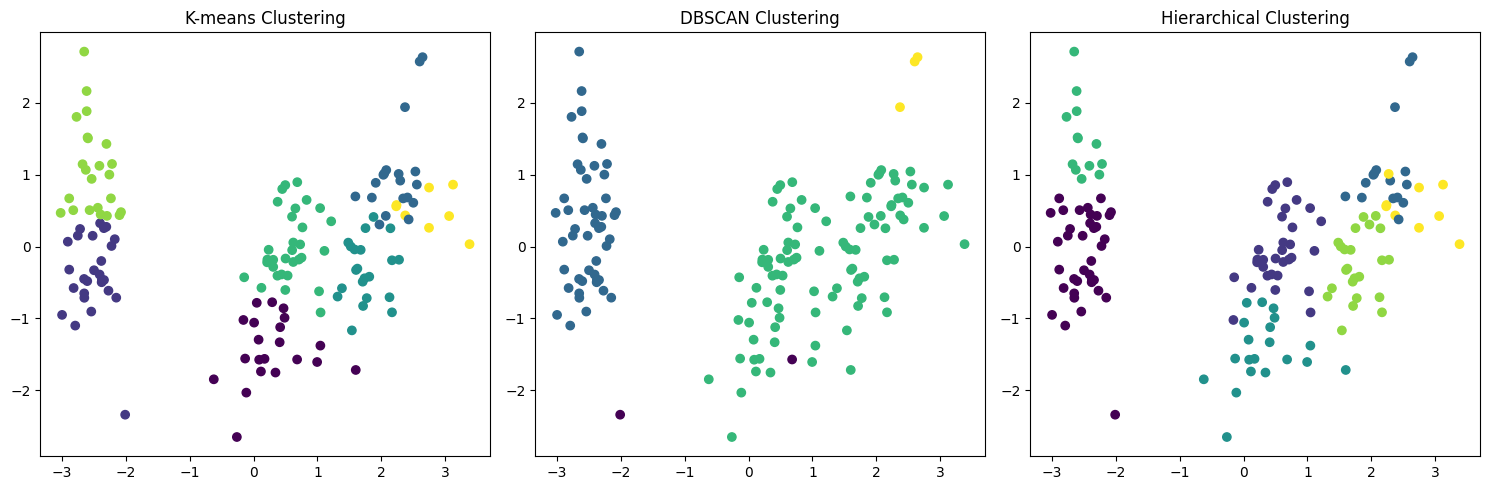

In [ ]:

import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the zoo dataset (you may need to adjust the path to your dataset)
Iris_1 = pd.read_csv('Iris.csv')

# Drop the animal name column for clustering
Iris_2= Iris_1.drop(columns=['Species'])

# Standardize the data
scaler = StandardScaler()
Iris_scaled = scaler.fit_transform(Iris_2)

# K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(Iris_scaled)

# DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan_labels = dbscan.fit_predict(Iris_scaled)

# Hierarchical Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=7)
hierarchical_labels = hierarchical.fit_predict(Iris_scaled)

# Visualization - PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
animals_pca = pca.fit_transform(Iris_scaled)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(animals_pca[:, 0], animals_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')

plt.subplot(132)
plt.scatter(animals_pca[:, 0], animals_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(133)
plt.scatter(animals_pca[:, 0], animals_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.tight_layout()
plt.show()
